##
# Part1:
##

###
## Importing Necessary Stuff
###

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

###
## Loading Datset
###

In [7]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


###
## displot
###

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


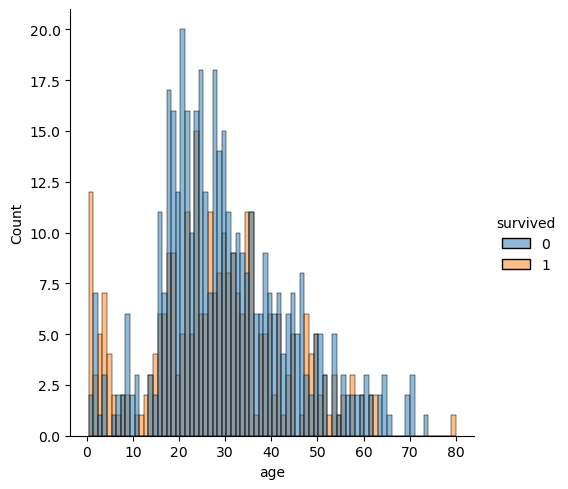

In [9]:
sns.displot( data = titanic, x = 'age', bins = 80, hue = 'survived')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


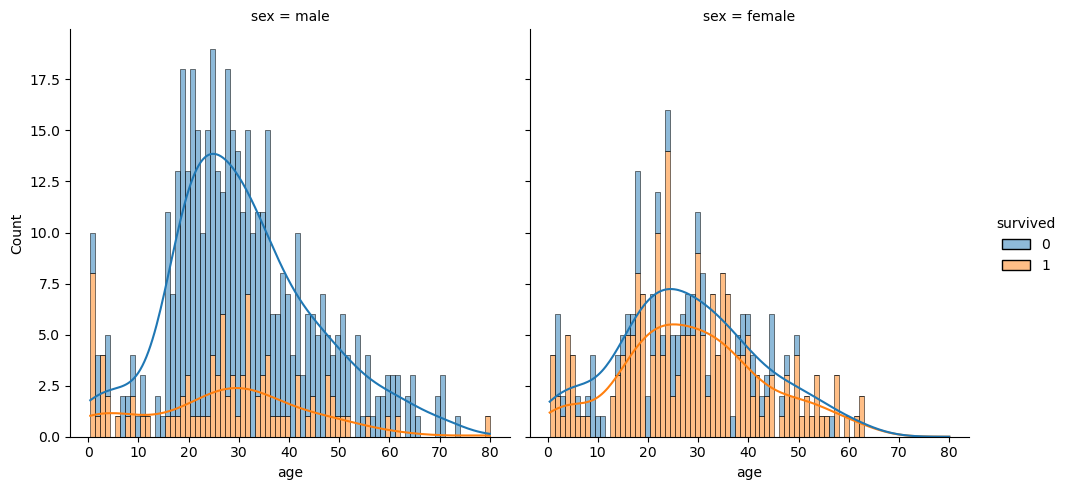

In [10]:
sns.displot( data = titanic, x = 'age', bins = 80, hue = 'survived', kde = True, multiple = 'stack', col = 'sex')

###
## Sex Column Value Count
###

In [12]:
titanic['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

###
## Number of People Survived
###

In [12]:
titanic[titanic['survived'] == 1]['sex'].value_counts()

sex
female    233
male      109
Name: count, dtype: int64

In [14]:
# % of survival (74% females survived and 19% males)
# survived/total

(233/314) * 100, (109/577) * 100 

(74.20382165605095, 18.890814558058924)

###
## Part2:
###

###
## mean age
###

In [15]:
titanic[titanic['sex'] == 'male']['age'].mean(), titanic[titanic['sex'] == 'female']['age'].mean()

(30.72664459161148, 27.915708812260537)

###
## Box Plot:
###

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


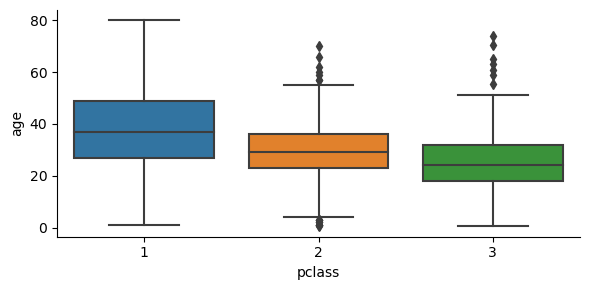

In [16]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box', height = 3, aspect = 2)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


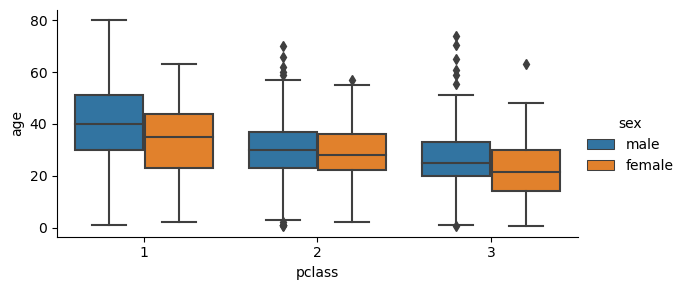

In [17]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box', height = 3, aspect = 2, hue = 'sex')

###
## Program for Filling Null Values of Column 'Age'
###

In [18]:
def impute_age(pclass, sex):
    
    if sex == 'male':
        
        if pclass == 1:
            return titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'male')]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['pclass'] == 2) & (titanic['sex'] == 'male')]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'male')]['age'].mean()
        
    else: 
        
        if pclass == 1:
            return titanic[(titanic['pclass'] == 1) & (titanic['sex'] != 'male')]['age'].mean()
        elif pclass == 2:
            return titanic[(titanic['pclass'] == 2) & (titanic['sex'] != 'male')]['age'].mean()
        elif pclass == 3:
            return titanic[(titanic['pclass'] == 3) & (titanic['sex'] != 'male')]['age'].mean()

In [21]:
titanic['age'] = titanic.apply( lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis = 1)


###
## Dataset After Fillling 'Age' Column Null Values
###

In [22]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.00,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,21.75,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.00,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


###
## Dataset Info After Filling 'Age' Column Null Values
###

In [23]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
titanic['age'].isnull().sum()

0